Imports

In [1]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt


2022-07-03 17:00:11.852838: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-03 17:00:11.852915: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Loading Dataset

In [2]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images,
                               test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
train_images[0].shape

(32, 32, 3)

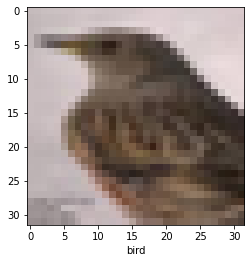

In [4]:
# Let's look at a one image
IMG_INDEX = 18  # change this to look at other images

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()


CNN Architecture

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

2022-07-03 17:00:51.793537: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-03 17:00:51.793597: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Puli): /proc/driver/nvidia/version does not exist
2022-07-03 17:00:51.794413: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

Adding Dense Layers

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Training

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


2022-07-03 17:00:54.870001: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
1561/1563 [============================>.] - ETA: 0s - loss: 1.5357 - accuracy: 0.4369

2022-07-03 17:02:01.367209: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


1563/1563 [==============================] - 62s 38ms/step - loss: 1.5357 - accuracy: 0.4370 - val_loss: 1.2714 - val_accuracy: 0.5446
Epoch 2/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.1640 - accuracy: 0.5869 - val_loss: 1.0468 - val_accuracy: 0.6257
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0192 - accuracy: 0.6445 - val_loss: 1.0037 - val_accuracy: 0.6475
Epoch 4/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.9179 - accuracy: 0.6772 - val_loss: 0.9511 - val_accuracy: 0.6663
Epoch 5/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.8532 - accuracy: 0.6992 - val_loss: 0.9317 - val_accuracy: 0.6754
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7977 - accuracy: 0.7212 - val_loss: 1.0059 - val_accuracy: 0.6528
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7467 - accuracy: 0.7380 - val_loss: 0.9099 - val_accura

Evaluating Model

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Accuracy : ', test_acc)

2022-07-03 17:10:11.106735: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


313/313 - 2s - loss: 0.8415 - accuracy: 0.7139 - 2s/epoch - 7ms/step
Accuracy :  0.7139000296592712
